# XGB MODEL TRAINING AND EXPERIMENTING WITH MLFLOW - NOUAR Alexandre & DURA Théo

In [1]:
import sys
import os

import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sb
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from xgboost import XGBClassifier

import mlflow
import mlflow.xgboost

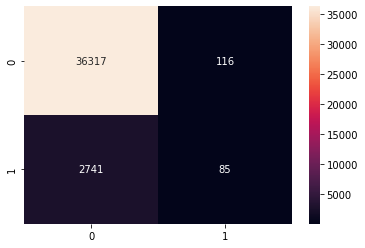

In [4]:
df_train = pd.read_csv('../data/processed/train_data.csv')
    
X = df_train.drop(columns = ['TARGET', 'Unnamed: 0'])
Y = df_train['TARGET']
    
X_train, X_test, y_train, y_test = train_test_split(X, Y)

eta= 0.3
subsample = 1
colsample = 1



# enable auto logging
mlflow.xgboost.autolog()
mlflow.set_experiment("XGBOOST")

with mlflow.start_run():
                        
    XGB = XGBClassifier(objective='binary:logistic', eval_metric="logloss", use_label_encoder=False, eta=eta, subsample=subsample
                           , colsample_bytree=colsample)
    XGB.fit(X_train, y_train)

    # evaluate model
    y_pred = XGB.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test,y_pred)
    prec = precision_score(y_test, y_pred)
                
    hm = sb.heatmap(cm,annot=True, fmt='g')
    plt.savefig('hm.png')
    mlflow.log_artifact("hm.png")
    os.remove('hm.png')
        
    # log metrics
    mlflow.log_metrics({"accuracy": acc,"precision": prec})
    mlflow.log_param("eta", eta)
    mlflow.log_param("colsample_bytree", colsample)
    mlflow.log_param("subsample", subsample)
        
    mlflow.xgboost.log_model(XGB, "XGB_model")
    
    


In [7]:
%run ../src/models/train_mlflow.py 0.3 1 1

FileNotFoundError: [Errno 2] No such file or directory: '../../data/processed/train_data.csv'